1. Carregamento da Base

In [1]:
import pandas as pd

# Definir o caminho completo do arquivo
file_path = r'C:\Users\DELL\Documents\ebac\portifolios\Base_M43_Pratique_Hypothyroid.csv'

try:
    # Carregar a base de dados
    df = pd.read_csv(file_path)

    # Imprimir algumas informações sobre o DataFrame
    print("Informações básicas do DataFrame:")
    print(df.info())
    print("\nAs 5 primeiras linhas do DataFrame:")
    print(df.head())
    print("\nNúmero de linhas e colunas:", df.shape)

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao tentar ler o arquivo: {e}")

Informações básicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      37

2. Limpeza e Conversão de Tipos

In [3]:
import numpy as np
import pandas as pd

# Substituir '?' por np.nan
df.replace('?', np.nan, inplace=True)

# Converter colunas numéricas
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar os novos tipos
print(df.dtypes)

# Exibir algumas informações sobre o DataFrame após a conversão
print("\nInformações do DataFrame após conversão numérica:")
print(df.info())

# Exibir as primeiras linhas para verificar a conversão
print("\nPrimeiras linhas do DataFrame:")
print(df.head())



age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

3. Verificação da Distribuição da Variável Alvo

In [4]:
# Distribuição da variável alvo
df['binaryClass'].value_counts()


binaryClass
P    3481
N     291
Name: count, dtype: int64

4. Visualização Inicial da Variável Alvo

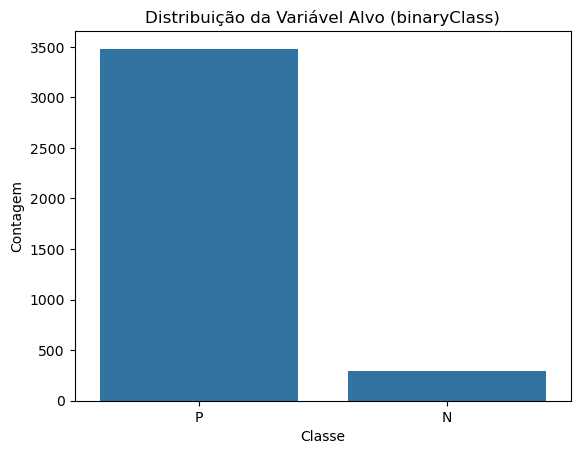

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='binaryClass', data=df)
plt.title('Distribuição da Variável Alvo (binaryClass)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()


5. Estatísticas e Visualizações

Distribuição de valores da coluna 'sex':
sex
F      2480
M      1142
NaN     150
Name: count, dtype: int64


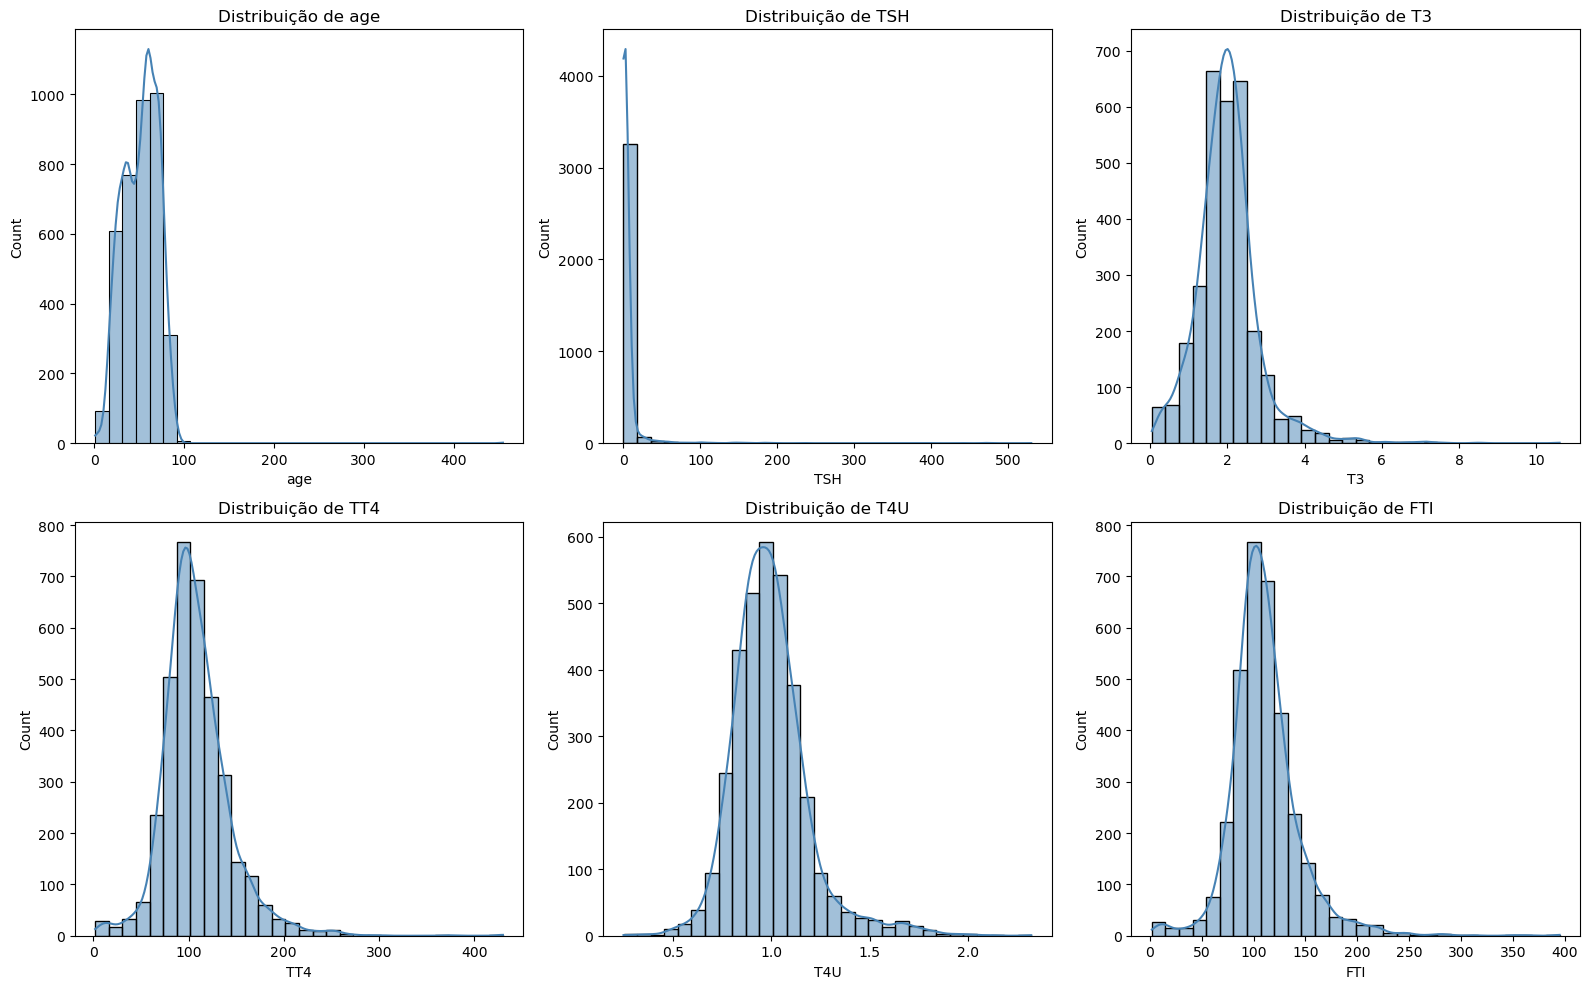

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estatísticas descritivas das variáveis numéricas
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
df[numeric_columns].describe()

# Distribuição da variável 'sex'
print("Distribuição de valores da coluna 'sex':")
print(df['sex'].value_counts(dropna=False))

# Plotando histogramas para variáveis numéricas
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue')
    plt.title(f'Distribuição de {col}')
    plt.tight_layout()

plt.show()


6. Etapas de Preparação para Modelagem
Remover colunas irrelevantes ou 100% nulas

Tratar valores ausentes

Codificar variáveis categóricas

Separar variáveis independentes (X) e alvo (y)

Dividir em treino e teste



6.1 Código Completo para Preparação

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Configura o pandas para não exibir o FutureWarning sobre downcasting
pd.set_option('future.no_silent_downcasting', True)

# Carrega o DataFrame
file_path = r'C:\Users\DELL\Documents\ebac\portifolios\Base_M43_Pratique_Hypothyroid.csv'
df = pd.read_csv(file_path)

# Substitui '?' por np.nan
df = df.replace('?', np.nan)

# Converte colunas numéricas
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar as colunas existentes
print("Colunas presentes no DataFrame antes da remoção:")
print(df.columns)

# 1. Remover colunas 100% nulas ou irrelevantes
cols_to_drop = ['TBG', 'referral source']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]  # Filtra colunas existentes
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"1. Colunas {cols_to_drop} removidas.")
else:
    print("1. Nenhuma coluna para remover encontrada.")

# 2. Preencher valores ausentes (numéricos com mediana, categóricos com moda)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
        print(f"   Valores ausentes em '{col}' (numérica) preenchidos com a mediana.")
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"   Valores ausentes em '{col}' (categórica) preenchidos com a moda.")
print("2. Valores ausentes preenchidos.")

# 3. Codificar variáveis categóricas
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

print("3. Codificando variáveis categóricas:")
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    print(f"   Coluna '{col}' codificada.")
print("   Variáveis categóricas codificadas.")

# 4. Separar features (X) e alvo (y)
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']
print("4. Features (X) e alvo (y) separados.")

# 5. Divisão em treino e teste
print("5. Dividindo os dados em treino e teste:")
print(f"   Tamanho de X antes da divisão: {len(X)}")
print(f"   Tamanho de y antes da divisão: {len(y)}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"   Tamanho de X_train: {len(X_train)}")
print(f"   Tamanho de X_test: {len(X_test)}")
print(f"   Tamanho de y_train: {len(y_train)}")
print(f"   Tamanho de y_test: {len(y_test)}")
print("   Dados divididos.")

print("\nTipos de dados após o pré-processamento:")
print(df.dtypes)
print("\nPrimeiras 5 linhas de X_train:")
print(X_train.head())
print("\nContagem de valores em y_train:")
print(y_train.value_counts())
print("\nContagem de valores em y_test:")
print(y_test.value_counts())




Colunas presentes no DataFrame antes da remoção:
Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')
1. Colunas ['TBG', 'referral source'] removidas.
   Valores ausentes em 'age' (numérica) preenchidos com a mediana.
   Valores ausentes em 'sex' (categórica) preenchidos com a moda.
   Valores ausentes em 'on thyroxine' (categórica) preenchidos com a moda.
   Valores ausentes em 'query on thyroxine' (categórica) preenchidos com a moda.
   Valores ausentes em 'on antithyroid medication' (categórica) preenchidos com a moda.
   Valores ausentes em 'sick' (categórica) pre

7. Treinamento e Avaliação de Modelos

Colunas presentes no DataFrame antes da remoção:
Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')
1. Colunas ['TBG', 'referral source'] removidas.
   Valores ausentes em 'age' (numérica) preenchidos com a mediana.
   Valores ausentes em 'sex' (categórica) preenchidos com a moda.
   Valores ausentes em 'on thyroxine' (categórica) preenchidos com a moda.
   Valores ausentes em 'query on thyroxine' (categórica) preenchidos com a moda.
   Valores ausentes em 'on antithyroid medication' (categórica) preenchidos com a moda.
   Valores ausentes em 'sick' (categórica) pre

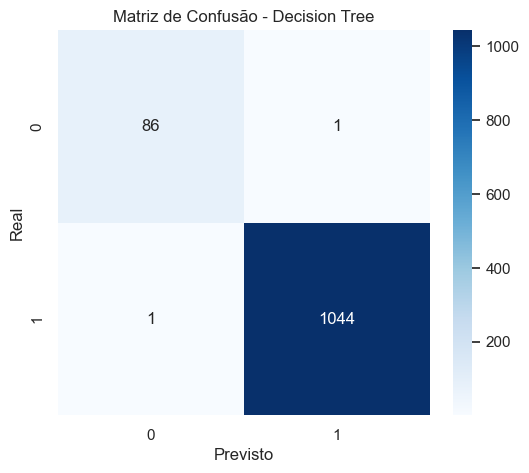


📌 Random Forest
Acurácia: 0.9955830388692579
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      1132
   macro avg       0.98      0.99      0.98      1132
weighted avg       1.00      1.00      1.00      1132

Matriz de Confusão:


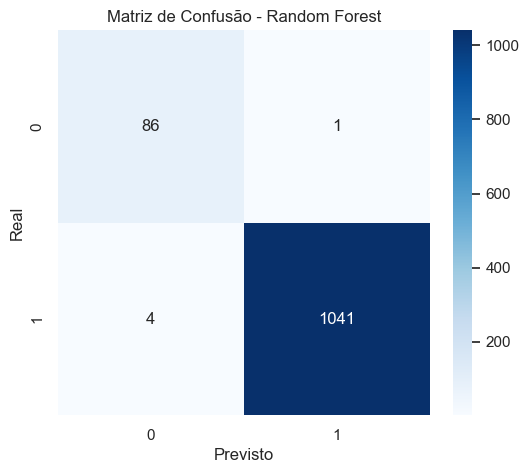


📌 XGBoost
Acurácia: 0.9973498233215548
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        87
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      1132
   macro avg       0.99      0.99      0.99      1132
weighted avg       1.00      1.00      1.00      1132

Matriz de Confusão:


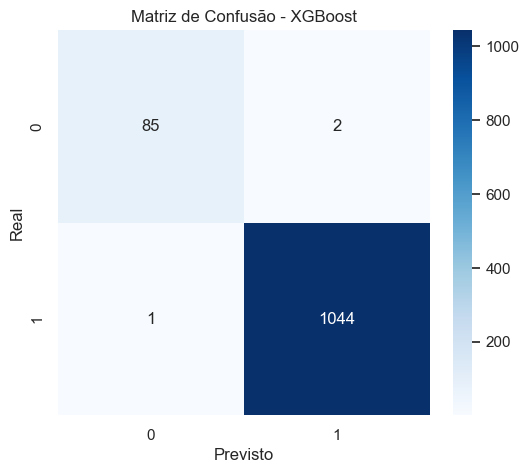

Avaliação dos modelos concluída.


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configura o pandas para não exibir o FutureWarning sobre downcasting
pd.set_option('future.no_silent_downcasting', True)

# Carrega o DataFrame
file_path = r'C:\Users\DELL\Documents\ebac\portifolios\Base_M43_Pratique_Hypothyroid.csv'
df = pd.read_csv(file_path)

# Substitui '?' por np.nan
df = df.replace('?', np.nan)

# Converte colunas numéricas
numeric_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar as colunas existentes
print("Colunas presentes no DataFrame antes da remoção:")
print(df.columns)

# 1. Remover colunas 100% nulas ou irrelevantes
cols_to_drop = ['TBG', 'referral source']
cols_to_drop = [col for col in cols_to_drop if col in df.columns]  # Filtra colunas existentes
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)
    print(f"1. Colunas {cols_to_drop} removidas.")
else:
    print("1. Nenhuma coluna para remover encontrada.")

# 2. Preencher valores ausentes (numéricos com mediana, categóricos com moda)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
        print(f"   Valores ausentes em '{col}' (numérica) preenchidos com a mediana.")
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"   Valores ausentes em '{col}' (categórica) preenchidos com a moda.")
print("2. Valores ausentes preenchidos.")

# 3. Codificar variáveis categóricas
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

print("3. Codificando variáveis categóricas:")
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    print(f"   Coluna '{col}' codificada.")
print("   Variáveis categóricas codificadas.")

# 4. Separar features (X) e alvo (y)
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']
print("4. Features (X) e alvo (y) separados.")

# 5. Divisão em treino e teste
print("5. Dividindo os dados em treino e teste:")
print(f"   Tamanho de X antes da divisão: {len(X)}")
print(f"   Tamanho de y antes da divisão: {len(y)}")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"   Tamanho de X_train: {len(X_train)}")
print(f"   Tamanho de X_test: {len(X_test)}")
print(f"   Tamanho de y_train: {len(y_train)}")
print(f"   Tamanho de y_test: {len(y_test)}")
print("   Dados divididos.")

print("\nTipos de dados após o pré-processamento:")
print(df.dtypes)
print("\nPrimeiras 5 linhas de X_train:")
print(X_train.head())
print("\nContagem de valores em y_train:")
print(y_train.value_counts())
print("\nContagem de valores em y_test:")
print(y_test.value_counts())


# Inicializando os modelos com random_state para reprodutibilidade
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=42

)  # Garante resultados consistentes

# Treinamento dos modelos
print("\nTreinando os modelos...")
model_dt.fit(X_train, y_train)
print("Decision Tree treinado.")
model_rf.fit(X_train, y_train)
print("Random Forest treinado.")
model_xgb.fit(X_train, y_train)
print("XGBoost treinado.")

# Predições nos dados de teste
print("\nRealizando predições com os modelos...")
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
print("Predições concluídas.")


# Função para avaliar o desempenho do modelo e exibir os resultados
def avaliar_modelo(nome, y_test, y_pred):
    """
    Avalia o desempenho de um modelo de classificação e exibe métricas e matriz de confusão.

    Args:
        nome (str): Nome do modelo para exibição nos resultados.
        y_test (array-like): Rótulos verdadeiros dos dados de teste.
        y_pred (array-like): Rótulos previstos pelo modelo.
    """
    print(f"\n📌 {nome}")  # Cabeçalho para identificar o modelo
    print("Acurácia:", accuracy_score(y_test, y_pred))  # Calcula e exibe a acurácia
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))  # Exibe o relatório de classificação
    print("Matriz de Confusão:")
    # Cria e exibe a matriz de confusão com um título descritivo
    plt.figure(figsize=(6, 5))  # Ajusta o tamanho da figura para melhor visualização
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,  # Exibe os valores na matriz
        fmt="d",  # Formata os valores como inteiros
        cmap="Blues",  # Usa um mapa de cores azul
    )
    plt.title(f"Matriz de Confusão - {nome}")  # Adiciona um título ao gráfico
    plt.xlabel("Previsto")  # Rótulo do eixo x
    plt.ylabel("Real")  # Rótulo do eixo y
    plt.show()  # Exibe o gráfico da matriz de confusão



# Avalia e exibe os resultados para cada modelo
print("\nAvaliando os modelos:")
avaliar_modelo("Decision Tree", y_test, y_pred_dt)
avaliar_modelo("Random Forest", y_test, y_pred_rf)
avaliar_modelo("XGBoost", y_test, y_pred_xgb)
print("Avaliação dos modelos concluída.")


8. Ajuste de Hiperparâmetros com GridSearchCV
Aplicaremos no Random Forest (por ser geralmente mais eficaz com bons ajustes) e depois interpretaremos os resultados.

Código para Ajuste de Hiperparâmetros

Melhores parâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

📈 Avaliação do Random Forest Otimizado:
Acurácia: 0.9973498233215548
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        87
           1       1.00      1.00      1.00      1045

    accuracy                           1.00      1132
   macro avg       0.99      0.99      0.99      1132
weighted avg       1.00      1.00      1.00      1132



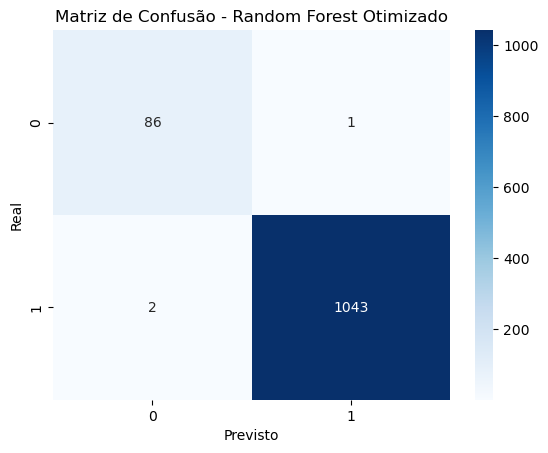

In [15]:
from sklearn.model_selection import GridSearchCV

# Hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Modelo base
rf_model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Treinamento com busca em grade
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_rf = grid_search.best_estimator_

# Avaliação do modelo otimizado
y_pred_best = best_rf.predict(X_test)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

print("\n📈 Avaliação do Random Forest Otimizado:")
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print("Acurácia:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Random Forest Otimizado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


9. Validação cruzada explícita na avaliação dos modelos

In [31]:
!pip install --upgrade xgboost

from sklearn.model_selection import cross_val_score

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    print(f"\n📌 {nome} - Validação Cruzada")
    print("Acurácia Média:", scores.mean())
    print("Desvio Padrão:", scores.std())

import warnings
warnings.filterwarnings('ignore')




📌 Decision Tree - Validação Cruzada
Acurácia Média: 0.9965534807736223
Desvio Padrão: 0.000649735826688193

📌 Random Forest - Validação Cruzada
Acurácia Média: 0.9957591301140056
Desvio Padrão: 0.0019462814451034363


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain,


📌 XGBoost - Validação Cruzada
Acurácia Média: 0.9952279234809494
Desvio Padrão: 0.001799080927431164


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:06:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


10. Balanceamento da classe alvo (caso desbalanceada)

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


11. Explicabilidade com SHAP (para modelos em produção)

In [23]:
!pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   -- ------------------------------------- 30.7/545.2 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 174.1/545.2 kB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 368.6/545.2 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 545.2/545.2 kB 3.4 MB/s eta 0:00:00


<Figure size 640x480 with 0 Axes>

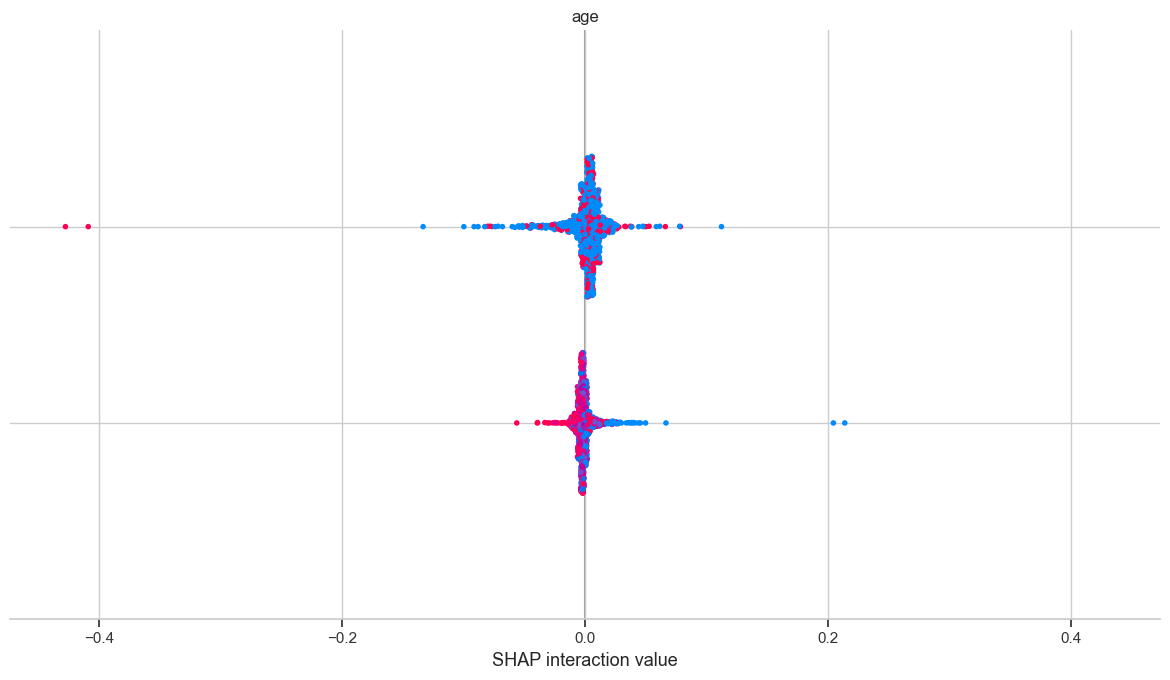

In [24]:
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
